In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/FS_plots/"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

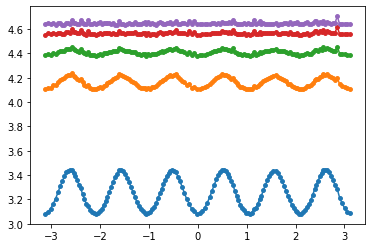

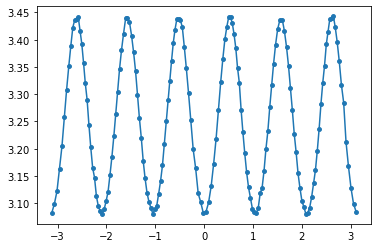

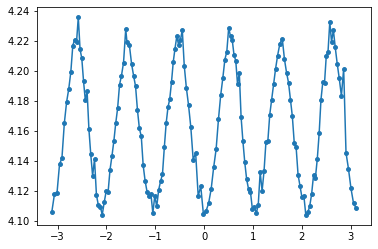

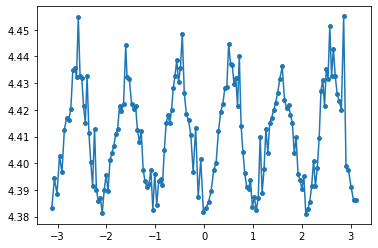

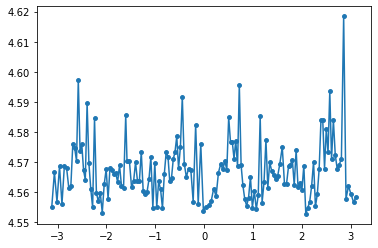

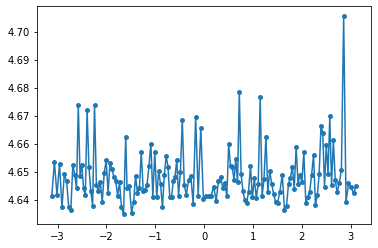

In [8]:

################
################
for T in [1.0,2.0,3.0,5.0,10.0]:
    df2=df.copy()
    df2=df2.loc[df['T']==T]
    df2=df2.sort_values(by=['theta'])
    tss=float(df2['T'].unique()[0])
    
    th=np.array(df2['theta'])[::2]
    se=np.array(df2['SE'])[::2]
    plt.scatter(th,se,  s=15,label=str(tss))
    plt.plot(th,se)
plt.show()

################
################
for T in [1.0,2.0,3.0,5.0,10.0]:
    df2=df.copy()
    df2=df2.loc[df['T']==T]
    df2=df2.sort_values(by=['theta'])
    tss=float(df2['T'].unique()[0])

    th=np.array(df2['theta'])[::2]
    se=np.array(df2['SE'])[::2]
    plt.scatter(th,se,  s=15,label=str(tss))
    plt.plot(th,se)
    plt.show()


Machine arg is, CH1
4.152809554652131 4.188790204786391 3 1.0 1
4.248624350271633 4.188790204786391 3 2.0 2
4.252682835738535 4.188790204786391 3 3.0 3
4.278166020776293 4.188790204786391 2 1.0 4
4.202086250072447 4.188790204786391 2 2.0 5
4.124340844215552 4.188790204786391 2 3.0 6
4.123067937853181 4.188790204786391 2 4.0 7
4.164876241180377 4.188790204786391 4 1.0 8
4.1544742814497075 4.188790204786391 4 2.0 9
4.239919209587549 4.188790204786391 4 3.0 10
4.240875612553267 4.188790204786391 3 4.0 11
4.155319612423323 4.188790204786391 3 5.0 12
4.165216752099402 4.188790204786391 3 6.0 13
4.123146387154271 4.188790204786391 5 1.0 14
4.202086250072447 4.188790204786391 5 2.0 15
4.20293181354317 4.188790204786391 5 3.0 16
4.278046532640911 4.188790204786391 5 4.0 17
4.252563082480305 4.188790204786391 4 4.0 18
4.246601786313679 4.188790204786391 4 5.0 19
4.150664532239245 4.188790204786391 4 6.0 20
4.155319612423323 4.188790204786391 0 1.0 21
4.249508523983405 4.188790204786391 0 2.0 22

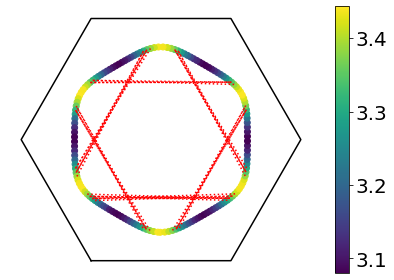

In [14]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################



df2=df.copy()
df2=df2.loc[df['T']==1.0]
df2=df2.sort_values(by=['theta'])
tss=float(df2['T'].unique()[0])
    
kfx=np.array(df2['KFX'])[::2]
kfy=np.array(df2['KFY'])[::2]
se=np.array(df2['SE'])[::2]
Npoints_FS=np.size(kfx)

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=scatter(kfx,kfy,c=se)

plt.gca().set_aspect('equal', adjustable='box')

cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)
yticks()
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)

plt.axis('off')


plt.tight_layout()
# plt.show()

norm_Q=np.sqrt(vx[0]**2+vy[0]**2)


c=0
[vx,vy]=l.boundary()
vx=vx[:-1]
vy=vy[:-1]
c=np.zeros(np.size(vx))
c2=0
index_HS=[]
for i in range(int(Npoints_FS)): #only checking half of the points is enough
    bx=kfx[i]
    by=kfy[i]
    for j  in range(np.size(vx)):
        vvx=vx[j]
        vvy=vy[j]
        dist=np.sqrt( (kfx-bx-vvx)**2 +(kfy-by-vvy)**2)
        ind_mindist=np.argmin(dist)
        dist=np.sqrt( (kfx-bx)**2 +(kfy-by)**2)
        if np.abs(dist[ind_mindist]-norm_Q)<.1 and c[j]<6:
            c[j]=1+c[j]
            QX=kfx[ind_mindist]
            QY=kfy[ind_mindist]
            line_x=np.array([bx,QX])
            line_y=np.array([by,QY])
            plt.plot(line_x,line_y,  c='r', ls=':')
            c2=c2+1
            print(dist[ind_mindist],norm_Q, j, c[j],c2)
            index_HS.append(i)
plt.show()



# df=df.sort_values(by=['theta'])
# plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss[0]))
# plt.scatter(df['theta'][index_HS], df['SE'][index_HS],  s=15,c='r')
# plt.plot(df['theta'], df['SE'])
# plt.legend()
# plt.show()


Machine arg is, CH1


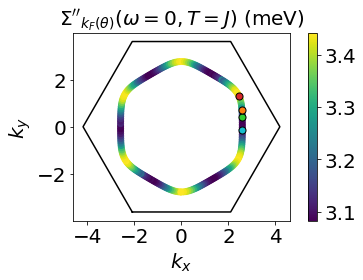

In [12]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################


path=pathy+'data2022-05-02-14-45-39.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=scatter(df['KFX'], df['KFY'],c=df['SE'], label="T="+str(i))

cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)


angles=np.array([0,12, 18, 30])*np.pi/180
list_ind=[]
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
for i,thet in enumerate(angles):
    ii=(np.argmin((np.angle(df['KFX']+1j*df['KFY'])-thet)**2))
    plt.scatter(df['KFX'][ii+1], df['KFY'][ii+1], zorder=2,s=50,  edgecolor='k', c=listcol[i])
   

plt.xlabel(r"$k_x$",size=20)
plt.ylabel(r"$k_y$",size=20)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)
# legend(ncol=1,prop={'size': 13})
plt.xticks(size=20)
plt.yticks(size=20)
plt.gca().set_aspect('equal', adjustable='box')
# plt.axis('off')
plt.title(r"$\Sigma ''_{k_F (\theta)}(\omega=0, T=J)$ (meV)", size=20)
# plt.text(7,-4.2,r"$\Sigma ''(k_F(\theta),0, T=J)$ (mev)", size=20, rotation =270)
plt.tight_layout()
# plt.show()
plt.savefig("./imgs/pap_fig1a.png", dpi=400)
plt.show()
plt.close()
# plt.show()

Machine arg is, CH1
4.152809554652131 4.188790204786391 3 1.0 1
4.202086250072447 4.188790204786391 2 1.0 2
4.164876241180377 4.188790204786391 4 1.0 3
4.1544742814497075 4.188790204786391 4 2.0 4
4.155319612423323 4.188790204786391 3 2.0 5
4.165216752099402 4.188790204786391 3 3.0 6
4.202086250072447 4.188790204786391 5 1.0 7
4.20293181354317 4.188790204786391 5 2.0 8
4.150664532239245 4.188790204786391 4 3.0 9
4.155319612423323 4.188790204786391 0 1.0 10
4.1593991955541485 4.188790204786391 5 3.0 11
4.161904060343441 4.188790204786391 1 1.0 12
4.163577827960614 4.188790204786391 0 2.0 13
4.1599842782080225 4.188790204786391 2 2.0 14
4.1544742814497075 4.188790204786391 1 2.0 15


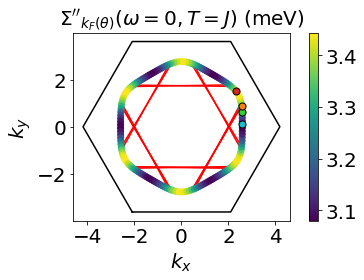

In [36]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################



df2=df.copy()
df2=df2.loc[df['T']==1.0]
df2=df2.sort_values(by=['theta'])
tss=float(df2['T'].unique()[0])
    
kfx=np.array(df2['KFX'])[::2]
kfy=np.array(df2['KFY'])[::2]
se=np.array(df2['SE'])[::2]
Npoints_FS=np.size(kfx)

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=scatter(kfx,kfy,c=se)

plt.gca().set_aspect('equal', adjustable='box')

cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)
yticks()
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)




plt.tight_layout()
# plt.show()

norm_Q=np.sqrt(vx[0]**2+vy[0]**2)


c=0
[vx,vy]=l.boundary()
vx=vx[:-1]
vy=vy[:-1]
c=np.zeros(np.size(vx))
c2=0
index_HS=[]
for i in range(int(Npoints_FS)): #only checking half of the points is enough
    bx=kfx[i]
    by=kfy[i]
    for j  in range(np.size(vx)):
        vvx=vx[j]
        vvy=vy[j]
        dist=np.sqrt( (kfx-bx-vvx)**2 +(kfy-by-vvy)**2)
        ind_mindist=np.argmin(dist)
        dist=np.sqrt( (kfx-bx)**2 +(kfy-by)**2)
        if np.abs(dist[ind_mindist]-norm_Q)<.04 and c[j]<3:
            c[j]=1+c[j]
            QX=kfx[ind_mindist]
            QY=kfy[ind_mindist]
            line_x=np.array([bx,QX])
            line_y=np.array([by,QY])
            plt.plot(line_x,line_y,  c='r', ls='-',lw=1.5,  zorder=-1)
            c2=c2+1
            print(dist[ind_mindist],norm_Q, j, c[j],c2)
            index_HS.append(i)





angles=np.array([0,12, 18, 30])*np.pi/180
list_ind=[]
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
for i,thet in enumerate(angles):
    ii=(np.argmin((np.angle(kfx+1j*kfy)-thet)**2))
    plt.scatter(kfx[ii+1], kfy[ii+1], zorder=20,s=50,  edgecolor='k', c=listcol[i])
   

plt.xlabel(r"$k_x$",size=20)
plt.ylabel(r"$k_y$",size=20)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)
# legend(ncol=1,prop={'size': 13})
plt.xticks(size=20)
plt.yticks(size=20)
plt.gca().set_aspect('equal', adjustable='box')
# plt.axis('off')
plt.title(r"$\Sigma ''_{k_F (\theta)}(\omega=0, T=J)$ (meV)", size=20)
# plt.text(7,-4.2,r"$\Sigma ''(k_F(\theta),0, T=J)$ (mev)", size=20, rotation =270)
plt.tight_layout()
# plt.show()
plt.savefig("./imgs/pap_fig1a.png", dpi=400)
plt.show()
plt.close()